<a href="https://colab.research.google.com/github/zzh8829/yolov3-tf2/blob/master/colab_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YoloV3 TF2 GPU Colab Notebook

##### Clone and install dependencies 

**IMPORTANT**: Restart following the instruction

In [1]:
#!git clone https://github.com/zzh8829/yolov3-tf2
%cd /Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2
!pip install -r requirements.txt

/Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2
Obtaining file:///Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2 (from -r requirements.txt (line 6))
  Found existing installation: yolov3-tf2 0.1
    Uninstalling yolov3-tf2-0.1:
      Successfully uninstalled yolov3-tf2-0.1
  Running setup.py develop for yolov3-tf2


In [2]:
import os
os.getcwd()

'/Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2'

##### Check Tensorflow2 version

In [3]:
%cd /Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2
!ls

import tensorflow as tf
tf.__version__

/Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2
LICENSE              detect.py            tools
README.md            detect_video.py      train.py
checkpoints          docs                 yolov3_tf2
colab_gpu.ipynb      logs                 yolov3_tf2.egg-info
conda-cpu.yml        output.jpg           yolov3_train_1.tf
conda-gpu.yml        requirements-gpu.txt yolov3_train_2.tf
convert.py           requirements.txt
data                 setup.py


'2.1.0-rc1'

##### Convert Pretrained Darknet Weight

In [4]:
#!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights
!python convert.py

2020-03-12 18:40:54.044603: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-03-12 18:40:54.056094: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7faf4ecbb690 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-03-12 18:40:54.056112: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
Model: "yolov3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, None,  0                                            
__________________________________________________________________________________________________
yolo_darknet (Model)            ((None, None, None,  40620640    input[0][0]                

I0312 18:40:58.220942 4543294912 utils.py:45] yolo_conv_0/conv2d_54 bn
I0312 18:40:58.226307 4543294912 utils.py:45] yolo_conv_0/conv2d_55 bn
I0312 18:40:58.260210 4543294912 utils.py:45] yolo_conv_0/conv2d_56 bn
I0312 18:40:58.266238 4543294912 utils.py:45] yolo_output_0/conv2d_57 bn
I0312 18:40:58.298368 4543294912 utils.py:45] yolo_output_0/conv2d_58 bias
I0312 18:40:58.302098 4543294912 utils.py:45] yolo_conv_1/conv2d_59 bn
I0312 18:40:58.303759 4543294912 utils.py:45] yolo_conv_1/conv2d_60 bn
I0312 18:40:58.305439 4543294912 utils.py:45] yolo_conv_1/conv2d_61 bn
I0312 18:40:58.315535 4543294912 utils.py:45] yolo_conv_1/conv2d_62 bn
I0312 18:40:58.318014 4543294912 utils.py:45] yolo_conv_1/conv2d_63 bn
I0312 18:40:58.324411 4543294912 utils.py:45] yolo_conv_1/conv2d_64 bn
I0312 18:40:58.326545 4543294912 utils.py:45] yolo_output_1/conv2d_65 bn
I0312 18:40:58.331714 4543294912 utils.py:45] yolo_output_1/conv2d_66 bias
I0312 18:40:58.333604 4543294912 utils.py:45] yolo_conv_2/conv2d_

##### Initialize Detector

In [1]:
import sys
from absl import app, logging, flags
from absl.flags import FLAGS
import time
import cv2
import numpy as np
import tensorflow as tf
from yolov3_tf2.models import (
    YoloV3, YoloV3Tiny
)
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs

flags.DEFINE_string('classes', './data/coco.names', 'path to classes file')
flags.DEFINE_string('weights', './checkpoints/yolov3_train_3.tf','path to weights file')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_string('image', './data/girl.png', 'path to input image')
flags.DEFINE_string('tfrecord', None, 'tfrecord instead of image')
flags.DEFINE_string('output', './output.jpg', 'path to output image')
flags.DEFINE_integer('num_classes', 1, 'number of classes in the model')

app._run_init(['yolov3'], app.parse_flags_with_usage)

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

['yolov3']

##### Checking the newly converted tfrecord Dataset

In [17]:
!python tools/visualize_dataset.py --dataset ./data/val.tfrecord --classes=./data/coco.names

I0312 18:35:23.847468 4405988800 visualize_dataset.py:22] classes loaded
2020-03-12 18:35:23.848305: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-03-12 18:35:23.861022: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fcc916e7160 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-03-12 18:35:23.861038: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-03-12 18:35:34.111986: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:150] Filling up shuffle buffer (this may take a while): 333 of 512
2020-03-12 18:35:40.138243: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:199] Shuffle buffer filled.
I0312 18:35:40.179184 4405988800 visualize_dataset.py:43] labels:
I0312 18:35:40.179589 4405988800 visualize_dataset.py:47] 	pedestrian, 1, [0.15677084 0.6018519  0.21979167 

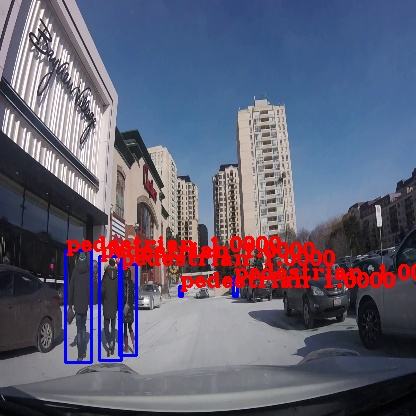

In [18]:
from IPython.display import Image
Image(filename='./output.jpg')

In [5]:
!python train.py \
	--dataset ./data/train.tfrecord \
	--val_dataset ./data/val.tfrecord \
	--classes ./data/coco.names \
	--num_classes 1 \
	--mode fit --transfer darknet \
	--batch_size 16 \
	--epochs 3 \
	--weights '/Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2/checkpoints/yolov3.tf' \
	--weights_num_classes 80 \
	--learning_rate 1e-4

2020-03-12 18:41:24.986806: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-03-12 18:41:24.997625: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9465d82260 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-03-12 18:41:24.997642: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
Epoch 1/3
2020-03-12 18:41:52.577761: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:150] Filling up shuffle buffer (this may take a while): 386 of 512
2020-03-12 18:41:55.862321: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:199] Shuffle buffer filled.
2020-03-12 18:42:01.693075: I tensorflow/core/profiler/lib/profiler_session.cc:225] Profiler session started.
   2320/Unknown - 13642s 6s/step - loss: 233.9853 - yolo_output_0_loss: 2.9445 - yolo_output_1_loss: 34.1117 - yolo_output_2_lo

In [77]:
# continued transfer learning at lower learning rate

!python train.py \
	--dataset ./data/val.tfrecord \
	--val_dataset ./data/val.tfrecord \
	--classes ./data/coco.names \
	--num_classes 1 \
	--mode fit --transfer continue_training \
	--batch_size 8 \
	--epochs 1 \
	--learning_rate 1e-5 \
	--weights ./checkpoints/yolov3_train_1.tf \
	--weights_num_classes 80 

2020-03-06 11:01:45.713512: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-03-06 11:01:45.727194: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa6c6d82990 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-03-06 11:01:45.727208: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-03-06 11:02:11.794381: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:150] Filling up shuffle buffer (this may take a while): 338 of 512
2020-03-06 11:02:17.278954: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:199] Shuffle buffer filled.
2020-03-06 11:02:24.686848: I tensorflow/core/profiler/lib/profiler_session.cc:225] Profiler session started.
    798/Unknown - 7970s 10s/step - loss: 34.3679 - yolo_output_0_loss: 0.0099 - yolo_output_1_loss: 4.5706 - yolo_output_2_loss: 8.459020

##### Inference 

I0313 09:12:52.597350 4657065408 <ipython-input-9-5b1e20a98e21>:16] weights loaded
I0313 09:12:52.598447 4657065408 <ipython-input-9-5b1e20a98e21>:19] classes loaded
I0313 09:12:53.011602 4657065408 <ipython-input-9-5b1e20a98e21>:30] time: 0.383026123046875
I0313 09:12:53.012304 4657065408 <ipython-input-9-5b1e20a98e21>:32] detections:
I0313 09:12:53.014388 4657065408 <ipython-input-9-5b1e20a98e21>:36] 	pedestrian, 0.9517010450363159, [0.2176658 0.341942  0.2775596 0.5311417]
I0313 09:12:53.015772 4657065408 <ipython-input-9-5b1e20a98e21>:36] 	pedestrian, 0.8927751183509827, [0.59242284 0.3525005  0.69939625 0.7588933 ]
I0313 09:12:53.017708 4657065408 <ipython-input-9-5b1e20a98e21>:36] 	pedestrian, 0.754292905330658, [0.09654    0.29017183 0.15177351 0.52639455]


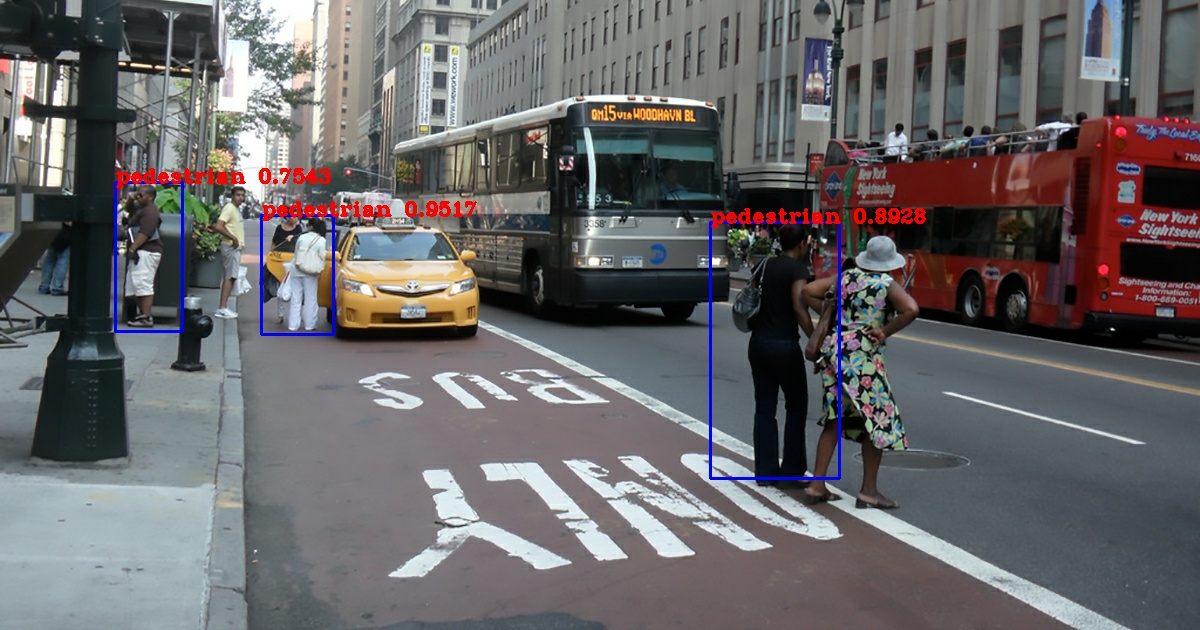

In [9]:
FLAGS.num_classes = 1
FLAGS.classes = 'data/coco.names'
FLAGS.weights = 'checkpoints/yolov3_train_3.tf'
FLAGS.image = 'data/street.jpg'

# Lower threshold due to insufficient training
FLAGS.yolo_iou_threshold = 0.2
FLAGS.yolo_score_threshold = 0.2

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)

yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
img = draw_outputs(img, (boxes, scores, classes, nums), class_names)

from IPython.display import Image, display
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

In [5]:
#flags.DEFINE_string('video', '/data/video_0338.mp4','path to video file or number for webcam)')
#flags.DEFINE_string('output','/data/result_video_0338.mp4', 'path to output video')
flags.DEFINE_string('output_format', 'XVID', 'codec used in VideoWriter when saving video to file')


In [21]:
# video detection

import cv2

FLAGS.num_classes = 1
FLAGS.classes = 'data/coco.names'
FLAGS.weights = 'checkpoints/yolov3_train_3.tf'
#FLAGS.image = 'data/street.jpg'
FLAGS.video = '/Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2/data/video_00.mp4'
FLAGS.output = '/Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2/data/result_video_00.mp4'
FLAGS.output_format = 'mp4v'

# Lower threshold due to insufficient training
FLAGS.yolo_iou_threshold = 0.2
FLAGS.yolo_score_threshold = 0.2

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)

yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

times = []

try:
    vid = cv2.VideoCapture(int(FLAGS.video))
except:
    vid = cv2.VideoCapture(FLAGS.video)

out = None

if FLAGS.output:
    # by default VideoCapture returns float instead of int
    width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(vid.get(cv2.CAP_PROP_FPS))
    codec = cv2.VideoWriter_fourcc(*FLAGS.output_format)
    out = cv2.VideoWriter(FLAGS.output, codec, fps, (width, height))

while True:
    _, img = vid.read()

    if img is None:
        break
        logging.warning("Empty Frame")
        time.sleep(0.1)
        continue

    img_in = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img_in = tf.expand_dims(img_in, 0)
    img_in = transform_images(img_in, FLAGS.size)

    t1 = time.time()
    boxes, scores, classes, nums = yolo.predict(img_in)
    t2 = time.time()
    times.append(t2-t1)
    times = times[-20:]

    img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
    img = cv2.putText(img, "Time: {:.2f}ms".format(sum(times)/len(times)*1000), (0, 30),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
        
    if FLAGS.output:
        out.write(img)
    #cv2.imshow('output', img)
    if cv2.waitKey(1) == ord('q'):
        break

cv2.destroyAllWindows()



I0313 13:58:29.902309 4657065408 <ipython-input-21-ee5d59c265b2>:23] weights loaded
I0313 13:58:29.903640 4657065408 <ipython-input-21-ee5d59c265b2>:26] classes loaded
